# Trabalho 1
## Funções utilizadas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(name: str, vectors, show_area = False):
    plt.figure(figsize=(6, 6))

    for vec in vectors:
        plt.quiver(0, 0, vec["x"], vec["y"], angles='xy', scale_units='xy', scale=1, color=vec["color"], label=vec["name"])

    if show_area and len(vectors) == 2:
        v1 = np.array([vectors[0]["x"], vectors[0]["y"]])
        v2 = np.array([vectors[1]["x"], vectors[1]["y"]])

        corners = np.array([[0,0], v1, v1+v2, v2, [0,0]])
        plt.fill(corners[:,0], corners[:,1], color='green', alpha=0.3,
                 label=f"det = {abs(determinant_2d(v1, v2)):.2f}")


    plt.xlim(-6, 7)
    plt.ylim(-6, 7)
    plt.xticks(range(-6, 7))
    plt.yticks(range(-6, 7))

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid(True)

    plt.legend()
    plt.xlabel("X", fontsize=12)
    plt.ylabel("Y", fontsize=12)
    plt.title(name, fontsize=14, fontweight='bold')

    plt.show()

def transform_vector(vector, matrix):
    return matrix @ vector

def create_shear_matrix(k):
    return np.array([[1, k], [0, 1]])

def determinant_2d(v1, v2):
    matrix = np.array([v1, v2]).T
    return np.linalg.det(matrix)

# 1 - Rotação horária de 90° seguida de Shear

### Vetores originais:

$$
\vec{A} =
\begin{bmatrix}1 \\ 0\end{bmatrix}, \quad
\vec{B} =
\begin{bmatrix}0 \\ 1\end{bmatrix}
$$

---

### Matriz de transformação Rotação

$$
M =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$

---

### Matriz de transformação Shear com k = 2

$$
M =
\begin{bmatrix}
1 & 2 \\
0 & 1
\end{bmatrix}
$$

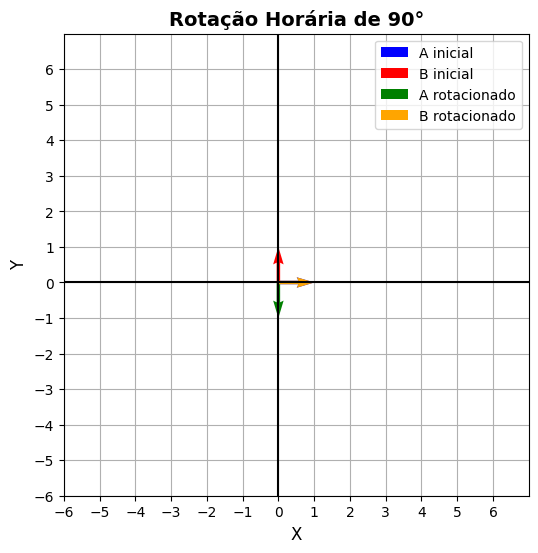

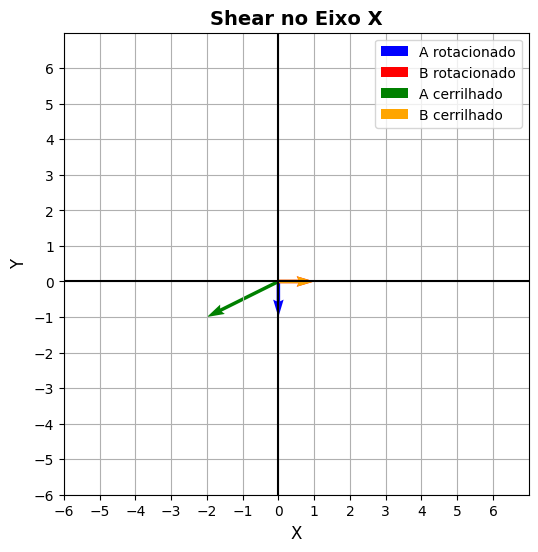

In [115]:
initial_A = np.array([1, 0])
initial_B = np.array([0, 1])

rotation_matrix = np.array([[0, 1], [-1, 0]])

rotated_A = transform_vector(initial_A, rotation_matrix)
rotated_B = transform_vector(initial_B, rotation_matrix)

draw_graph("Rotação Horária de 90°",
    [
        #vetores originais
        {"name": "A inicial", "x": initial_A[0], "y": initial_A[1], "color": "blue"},
        {"name": "B inicial", "x": initial_B[0], "y": initial_B[1], "color": "red"},

        #vetores rotacionados
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "green"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "orange"}
    ]
)

k = 2
shear_matrix = create_shear_matrix(k)

sheared_A = transform_vector(rotated_A, shear_matrix)
sheared_B = transform_vector(rotated_B, shear_matrix)

draw_graph("Shear no Eixo X",
    [
        #vetores unitários originais
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "blue"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "red"},

        #vetores cerrilhados
        {"name": "A cerrilhado", "x": sheared_A[0], "y": sheared_A[1], "color": "green"},
        {"name": "B cerrilhado", "x": sheared_B[0], "y": sheared_B[1], "color": "orange"}
    ]
)

# 2 - Determinante

### O determinante mede o “espaço” que os vetores ocupam no plano e a orientação deles, quando se aplica uma transformação linear, o determinante da matriz de transformação multiplica o determinante dos vetores.

### Logo, a área (determinante) é modificada de forma proporcional aos vetores, aumentando, diminuindo ou mantendo o tamanho dependendo do determinante da matriz de transformação:
- Se o determinante da matriz for igual a 1, a área dos vetores não muda.
- Se o determinante da matriz for diferente de 1, a área diminui ou aumenta proporcionalmente.

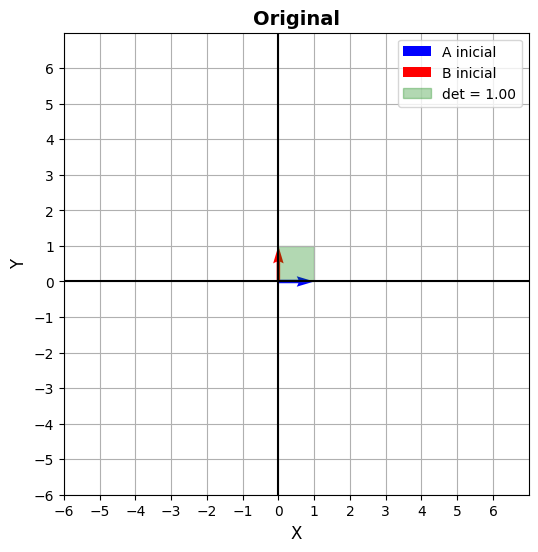

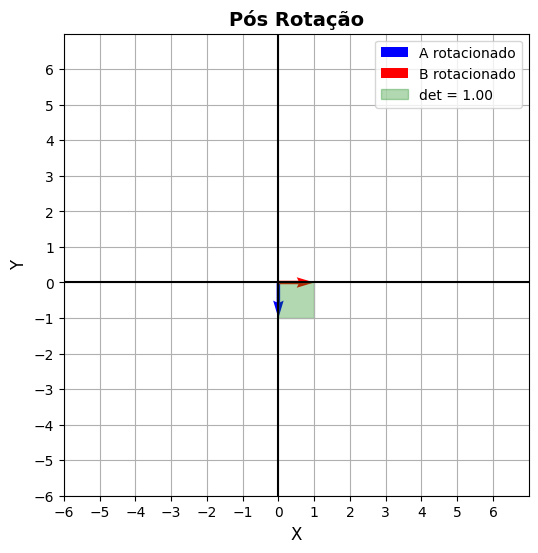

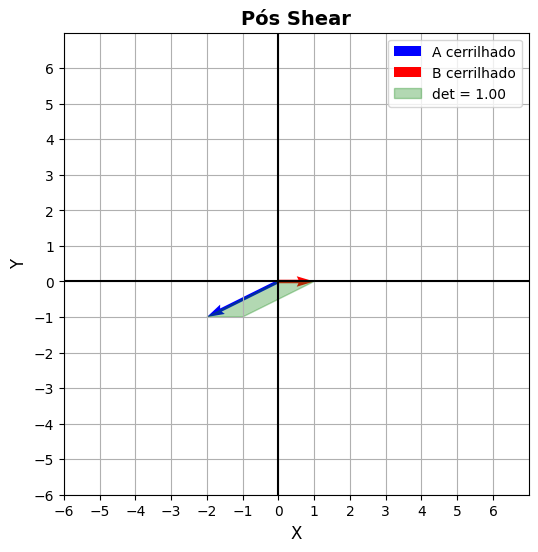

In [116]:
draw_graph("Original",
    [
        #vetores originais
        {"name": "A inicial", "x": initial_A[0], "y": initial_A[1], "color": "blue"},
        {"name": "B inicial", "x": initial_B[0], "y": initial_B[1], "color": "red"},
    ],
    True
)

draw_graph("Pós Rotação",
    [
        #vetores originais
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "blue"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "red"},
    ],
    True
)

draw_graph("Pós Shear",
    [
        #vetores originais
        {"name": "A cerrilhado", "x": sheared_A[0], "y": sheared_A[1], "color": "blue"},
        {"name": "B cerrilhado", "x": sheared_B[0], "y": sheared_B[1], "color": "red"},
    ],
    True
)


# 3 e 4 - Multiplicação de matrizes por composição

In [162]:
def matrix_multiplication_as_composition(m1: np.array, m2: np.array):
    m1 = m1.tolist()
    m2 = m2.tolist()
    
    m_final = []

    for i in range(len(m2)):
        m2_col = m2[i]
        col = np.array([0 for k in range(len(m2))])
        
        for j in range(len(m2_col)):
            m2_num = m2_col[j]
            col_multiply = (np.array(m1[j]) * m2_num)
            col += col_multiply
        
        col = col.tolist()
        m_final.append(col)
    
    return np.array(m_final).T

## 3 - Rotação seguido de Shear

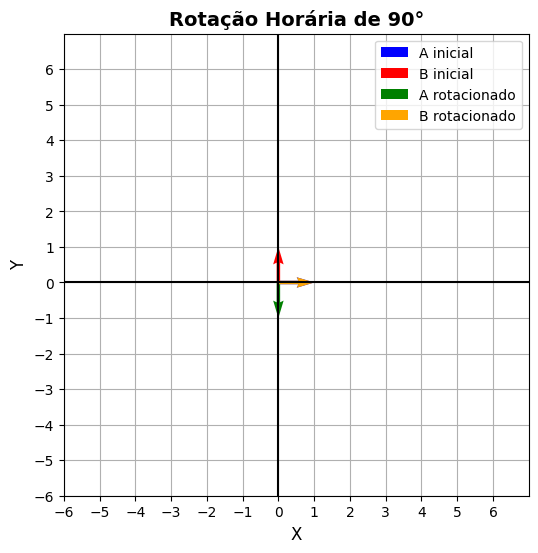

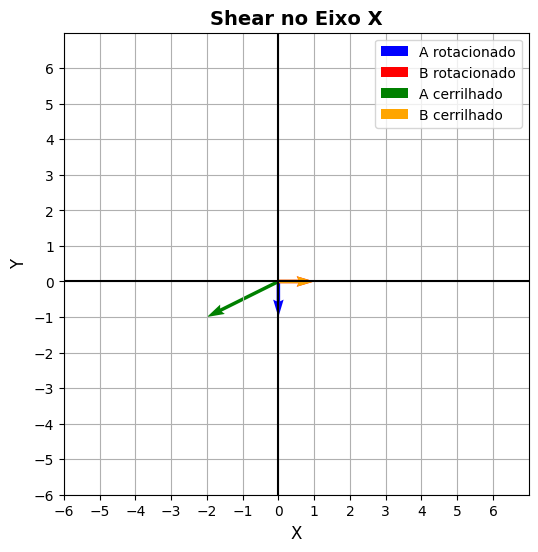

In [163]:
initial_A = np.array([1, 0])
initial_B = np.array([0, 1])

rotated_AB = matrix_multiplication_as_composition(np.column_stack((initial_A, initial_B)), rotation_matrix)
rotated_A = rotated_AB[0]
rotated_B = rotated_AB[1]

draw_graph("Rotação Horária de 90°",
    [
        #vetores originais
        {"name": "A inicial", "x": initial_A[0], "y": initial_A[1], "color": "blue"},
        {"name": "B inicial", "x": initial_B[0], "y": initial_B[1], "color": "red"},

        #vetores rotacionados
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "green"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "orange"}
    ]
)

sheared_AB = matrix_multiplication_as_composition(np.column_stack((rotated_A, rotated_B)), shear_matrix)
sheared_A = sheared_AB[0]
sheared_B = sheared_AB[1]

draw_graph("Shear no Eixo X",
    [
        #vetores unitários originais
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "blue"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "red"},

        #vetores cerrilhados
        {"name": "A cerrilhado", "x": sheared_A[0], "y": sheared_A[1], "color": "green"},
        {"name": "B cerrilhado", "x": sheared_B[0], "y": sheared_B[1], "color": "orange"}
    ]
)

## 4 - Shear seguido de Rotação

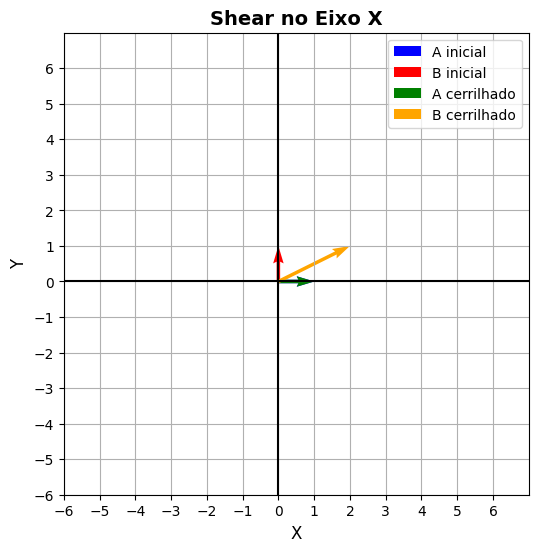

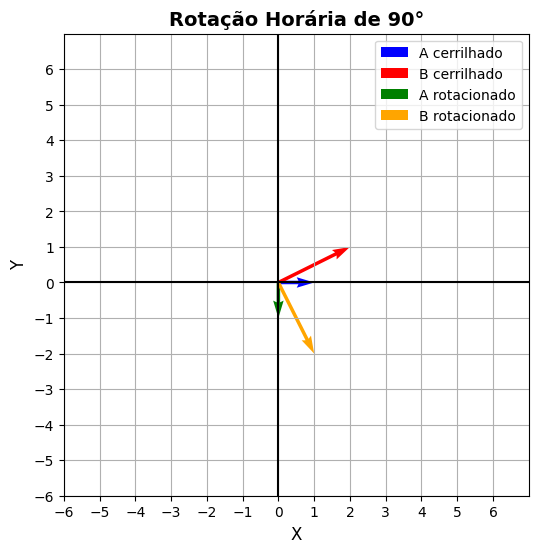

In [164]:
initial_A = np.array([1, 0])
initial_B = np.array([0, 1])

sheared_AB = matrix_multiplication_as_composition(np.column_stack((initial_A, initial_B)), shear_matrix)
sheared_A = sheared_AB[0]
sheared_B = sheared_AB[1]

draw_graph("Shear no Eixo X",
    [
        #vetores unitários originais
        {"name": "A inicial", "x": initial_A[0], "y": initial_A[1], "color": "blue"},
        {"name": "B inicial", "x": initial_B[0], "y": initial_B[1], "color": "red"},

        #vetores cerrilhados
        {"name": "A cerrilhado", "x": sheared_A[0], "y": sheared_A[1], "color": "green"},
        {"name": "B cerrilhado", "x": sheared_B[0], "y": sheared_B[1], "color": "orange"}
    ]
)

rotated_AB = matrix_multiplication_as_composition(np.column_stack((sheared_A, sheared_B)), rotation_matrix)
rotated_A = rotated_AB[0]
rotated_B = rotated_AB[1]

draw_graph("Rotação Horária de 90°",
    [
        #vetores originais
        {"name": "A cerrilhado", "x": sheared_A[0], "y": sheared_A[1], "color": "blue"},
        {"name": "B cerrilhado", "x": sheared_B[0], "y": sheared_B[1], "color": "red"},

        #vetores rotacionados
        {"name": "A rotacionado", "x": rotated_A[0], "y": rotated_A[1], "color": "green"},
        {"name": "B rotacionado", "x": rotated_B[0], "y": rotated_B[1], "color": "orange"}
    ]
)




# 5 - Produto escalar entre vetores X e Y


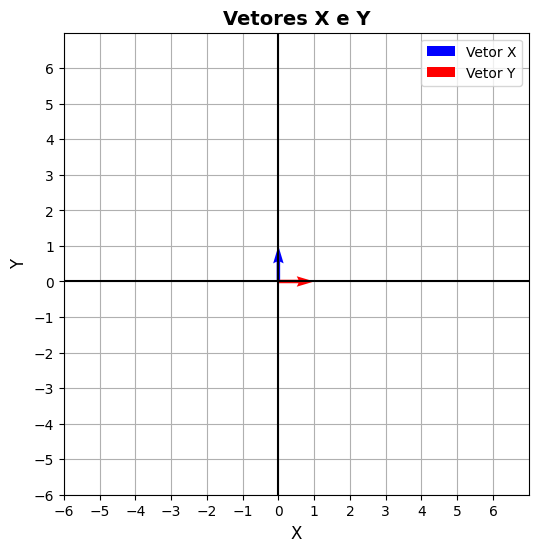

Produto escalar = 0


In [167]:
vec_x = np.array([0, 1])
vec_y = transform_vector(vec_x, rotation_matrix)

draw_graph("Vetores X e Y",
    [
        #vetores unitários originais
        {"name": "Vetor X", "x": vec_x[0], "y": vec_x[1], "color": "blue"},
        {"name": "Vetor Y", "x": vec_y[0], "y": vec_y[1], "color": "red"},
    ]
)

print(f"Produto escalar = {np.dot(vec_x, vec_y)}")

### Como os vetores são perpendiculares, o produto escalar entre eles sempre será 0, ou seja, os vetores não possuem nenhuma semelhança entre eles.

# 6 - Analisar resultado do seguinte código:

In [168]:
v1 = np.array([1, 2])
v2 = np.array([4, 5])

dot = np.dot(v1, v2)
print(dot)

14


### Como o produto escalar deu diferente de 0, significa que os vetores não são perpendiculares. Além disso, por ser um número positivo, significa que eles apontam parcialmente na mesma direção.